In [4]:
import pyarrow.parquet as pq
import time
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os
os.chdir("/home/jovyan/jupyterLogs/")
os.getcwd()

'/home/jovyan/jupyterLogs'

In [ ]:
parquet_file = pq.ParquetFile('inversionloggingGroups/energy.parquet')
print(parquet_file.metadata)
print(parquet_file.schema)

# Batch iterator. Slower than row groups
# def parquet_iterator(parquet_file, column):
#   for record_batch in parquet_file.iter_batches(batch_size=1000):
#       for row in record_batch.to_pandas()[column]:
#           yield row
          
def parquet_iterator(parquet_file, column):
  for index in range(parquet_file.metadata.num_row_groups):
      record_batch = parquet_file.read_row_group(index)
      for row in record_batch.to_pandas()[column]:
        yield row

  created_by: parquet-mr version 1.15.1 (build c7257b8faff5699e13bbc781679dc03f48c1102a)
  num_columns: 9
  num_rows: 100001
  num_row_groups: 1001
  format_version: 1.0
  serialized_size: 1232137
required group field_id=-1 energy {
  required double field_id=-1 TotalEnergy;
  required double field_id=-1 EqualityEnergy;
  required double field_id=-1 EntropyEnergy;
  required double field_id=-1 InequalityEnergy;
  required double field_id=-1 UncertainSlipRate;
  required double field_id=-1 PaleoseismicEventRate;
  required double field_id=-1 LaplacianSmoothingselectparents;
  required double field_id=-1 RuptureRateMinimization;
  required double field_id=-1 UncertainMFDEquality;
}



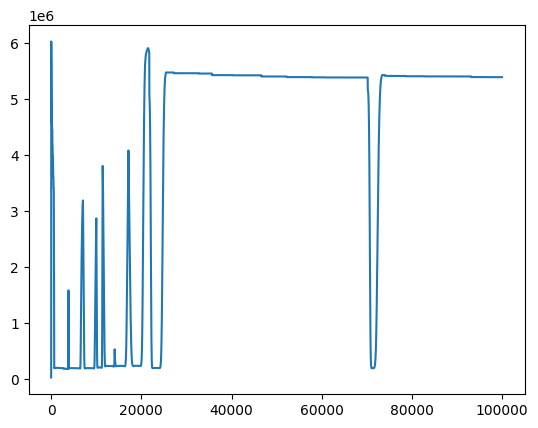

In [8]:
plt.plot(tuple(parquet_iterator(parquet_file, 'TotalEnergy')))